In [10]:
import pandas
database = pandas.read_csv('titanic_train.csv')

In [11]:
database.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
gender = database['Sex']

In [13]:
survive = database['Survived']

In [14]:
import seaborn

C:\Users\AshishKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

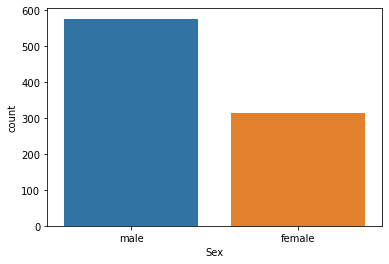

In [15]:
seaborn.countplot(gender)

C:\Users\AshishKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

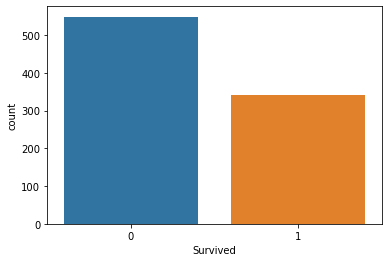

In [16]:
seaborn.countplot(survive)

C:\Users\AshishKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

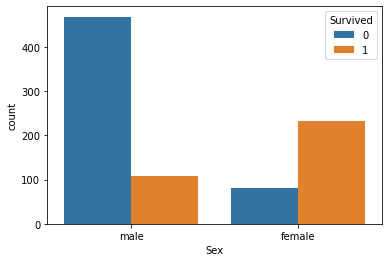

In [17]:
seaborn.countplot(gender, hue='Survived', data=database)

C:\Users\AshishKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

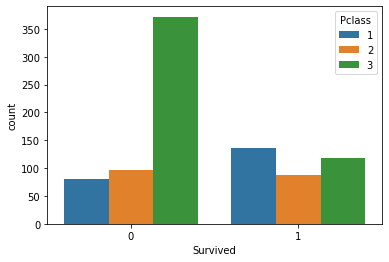

In [18]:
seaborn.countplot(survive, hue='Pclass', data=database)

In [19]:
X = database[[ 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Cabin', 'Embarked']]

In [20]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S


In [21]:
y = database[['Survived']]

In [22]:
y.head(3)

,Survived
0,0
1,1
2,1


In [23]:
# this will return all the place in dataset which has null value
X.isnull()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
886,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False
888,False,False,True,False,False,True,False
889,False,False,False,False,False,False,False


<AxesSubplot:>

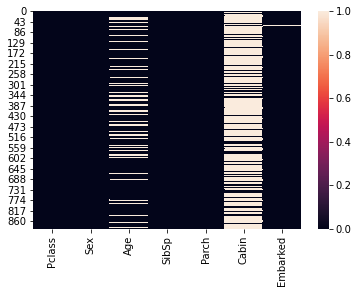

In [24]:
seaborn.heatmap(X.isnull())

As we can see clearly that the Cabin field has lot of missing value so It is better to remove that field

In [25]:
# axis 0 = Row and axix 1 = Column (Here we need to drop column)
# labels = the field we need to drop
# inplace = True (means that after droping the field return the change in the dataset )
X.drop(axis=1, labels='Cabin', inplace=True)

C:\Users\AshishKumar\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S


<AxesSubplot:>

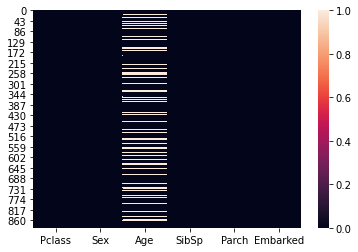

In [27]:
seaborn.heatmap(X.isnull())

Since the age field also has some missing values, but we will not remove them. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

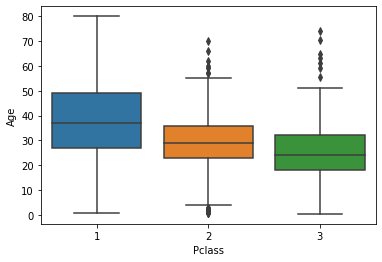

In [28]:
seaborn.boxplot(y='Age', x='Pclass' , data=X)

In [68]:
X.head(30)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
5,3,male,NaN,0,0,Q
6,1,male,54.0,0,0,S
7,3,male,2.0,3,1,S
8,3,female,27.0,0,2,S
9,2,female,14.0,1,0,C


In [30]:
from sklearn.preprocessing import LabelEncoder 

In [31]:
# storing LabelEncoder function inside le_func variable
le_func = LabelEncoder()

In [32]:
# converting Pclass into label encoding
le = le_func.fit_transform(X['Pclass'])

# changing the dimension into 2D
le = le.reshape(-1,1)

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
# storing OneHotEncoder function in variable ohe_func
ohe_func = OneHotEncoder()

In [35]:
# for converting categorical variable into dummy variable
ohe = ohe_func.fit_transform(le)

In [36]:
# converting dummy variable into array
ohe_arr = ohe.toarray()

In [37]:
# droping one field to avoid dummy variable trap
ohe_final = ohe_arr[:,:2]

In [38]:
y_age = database['Age']
# converting into numpy
y_age = y_age.values
y_age = y_age.reshape(-1,1)

In [39]:
import numpy 

#combining both x and y field horizontally
newval = numpy.hstack((ohe_final, y_age))

# droping all the rows in numpy which has NaN value
newval = newval[~numpy.isnan(newval).any(axis=1)]


#after removing rows with NaN
# seperating x and y field for LinearRegression
x = newval[:, :2]
y = newval[: , 2]

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(x, y)

LinearRegression()

In [52]:
# 1 class passanger age
model.predict([[1,0]]).tolist()[0]

38.233440860215055

In [53]:
# 2 class passanger age
model.predict([[0,1]]).tolist()[0]

29.877630057803465

In [54]:
# 3 class passanger age
model.predict([[0,0]]).tolist()[0]

25.140619718309853

In [55]:
model.coef_

array([13.09282114,  4.73701034])

In [56]:
model.intercept_

25.140619718309853

In [72]:
sex = database['Sex']
sex_dummy = pandas.get_dummies(sex, drop_first=True)

In [74]:
pclass = database['Pclass']
pclass_dummy = pandas.get_dummies(pclass, drop_first=True)

In [76]:
sibsp =database['SibSp']
sibsp_dummy = pandas.get_dummies(sibsp, drop_first=True)

In [78]:
parch = database['Parch']
parch_dummy = pandas.get_dummies(parch, drop_first=True)

In [80]:
embarked = database['Embarked']
emabacked_dummy = pandas.get_dummies(embarked, drop_first=True)

In [190]:
def agePredictor(columns):
    pclass = columns[0]
    age = columns[1]
    if pandas.isnull(age):
        if pclass == 1:
            return round(model.predict([[1,0]]).tolist()[0])
        elif pclass == 2:
            return round(model.predict([[0,1]]).tolist()[0])
        elif pclass == 3:
            return round(model.predict([[0,0]]).tolist()[0])
        else: 
            return 30
    else:
        return age

In [191]:
age_without_null = database[['Pclass', 'Age']].apply(agePredictor, axis=1)

In [192]:
final_dataset = pandas.concat([sex_dummy, pclass_dummy, sibsp_dummy, parch_dummy, emabacked_dummy, age_without_null, database[['Survived']]], axis=1)

In [193]:
final_ds = final_dataset.dropna()

In [194]:
X = final_ds.iloc[:, 0:-1]

In [195]:
y = final_ds.iloc[: , -1]

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [198]:
from sklearn.linear_model import LogisticRegression

In [199]:
log_model = LogisticRegression()

In [200]:
log_model.fit(X_train, y_train)

C:\Users\AshishKumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [201]:
X_test.head(5)

,male,2,3,1,2,3,4,5,8,1,2,3,4,5,6,Q,S,0
709,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,25.0
439,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,31.0
840,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20.0
720,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6.0
39,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0


In [202]:
y_test.head(5)

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [203]:
y_pred = log_model.predict(X_test)

In [204]:
from sklearn import metrics

In [205]:
metrics.confusion_matrix(y_test, y_pred)

array([[91, 14],
       [21, 53]], dtype=int64)

In [206]:
confidence_score = (91+53) / (91+14+21+53) * 100

In [207]:
confidence_score

80.44692737430168